In [1]:
import numpy as np
import networkx as nx
import random
import copy

from AntColony import *

In [2]:
np.seterr(divide='ignore', invalid='ignore')  # this warning is not important, it is served in package

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
rng_seed = 2022

In [4]:
problem_small1 = Problem("./../../data/augerat/A-n32-k05.xml")
problem_small2 = Problem("./../../data/augerat/A-n44-k06.xml")

problem_medium1 = Problem("./../../data/augerat/A-n60-k09.xml")
problem_medium2 = Problem("./../../data/augerat/A-n69-k09.xml")

problem_big1 = Problem("./../../data/uchoa/X-n101-k25.xml")
problem_big2 = Problem("./../../data/uchoa/X-n120-k6.xml")

In [5]:
max_time = 300  # 5 minutes for an optimization -> 90 minuted for the notebook

Process of selecting the `s_max` and the `max_cars` parameters for every dataset.

Every dataset was chosen with such a `s_max`, so the Greedy algorithm finds the solution with a bigger number of cars than without the restriction. The `max_cars` was chosen such that the Greedy algorithm did not find such a path.

It turned out that the output of the other algorithms provided an even larger number of cars than the greedy algorithm. At least for the given amount of learning time. However, the Ant Colony algorithms' output can be easily corrected to use a smaller number of vehicles. For more conclusions, see the report.

# small1

In [6]:
s_max = 205 # 205 is 8, Inf is 5 cars for Greedy
max_cars = 7

In [7]:
greedy_s1 = Greedy(print_warnings=True)
greedy_s1.set_problem(s_max, max_cars, problem_small1)
greedy_s1.optimize()
greedy_s1.best_number_of_cycles

Adding 0 as technical request for warehouse



8

In [8]:
antColony_basic_s1 = AntColony(print_warnings=True)
antColony_basic_s1.set_problem(s_max, max_cars, problem_small1)
antColony_basic_s1.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 1606.549 and uses 9 trucks
New best solution in 2 iteration: cost = 1454.678 and uses 8 trucks
New best solution in 36 iteration: cost = 1431.245 and uses 8 trucks
New best solution in 81 iteration: cost = 1429.498 and uses 11 trucks
New best solution in 174 iteration: cost = 1345.158 and uses 8 trucks
New best solution in 280 iteration: cost = 1322.549 and uses 7 trucks
Time for optimization has passed on 2236th iteration



In [9]:
antColony_reduced_s1 = AntColony_Reduced(print_warnings=True)
antColony_reduced_s1.set_problem(s_max, max_cars, problem_small1)
antColony_reduced_s1.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 1424.644 and uses 10 trucks
New best solution in 7 iteration: cost = 1423.047 and uses 9 trucks
New best solution in 10 iteration: cost = 1369.822 and uses 10 trucks
New best solution in 13 iteration: cost = 1335.755 and uses 9 trucks
New best solution in 438 iteration: cost = 1326.150 and uses 9 trucks
New best solution in 925 iteration: cost = 1302.290 and uses 8 trucks
Time for optimization has passed on 2238th iteration



In [10]:
antColony_divided_s1 = AntColony_Divided(print_warnings=True)
antColony_divided_s1.set_problem(s_max, max_cars, problem_small1)
antColony_divided_s1.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
3 clusters used with counts [10, 7, 14]
Adding 0 as technical request for warehouse
3 clusters used with counts [10, 7, 14]
Adding 0 as technical request for warehouse

Optimization of cluster 1 with 10 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 742.290 and uses 4 trucks
New best solution in 3 iteration: cost = 741.868 and uses 4 trucks
New best solution in 13 iteration: cost = 741.868 and uses 4 trucks
Time for optimization has passed on 2254th iteration


Optimization of cluster 2 with 7 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 330.691 and uses 2 trucks
New best solution in 1 iteration: cost = 269.591 and uses 2 trucks
New best solution in 2 iteration: cost = 254.992 and uses 2 trucks
New best solution in 3 iteration: cost = 246.286 and uses 2 trucks
New best solution in 37 iteration: cost = 195.048 and uses 1 trucks
Time for optimization has passed on 2473th it

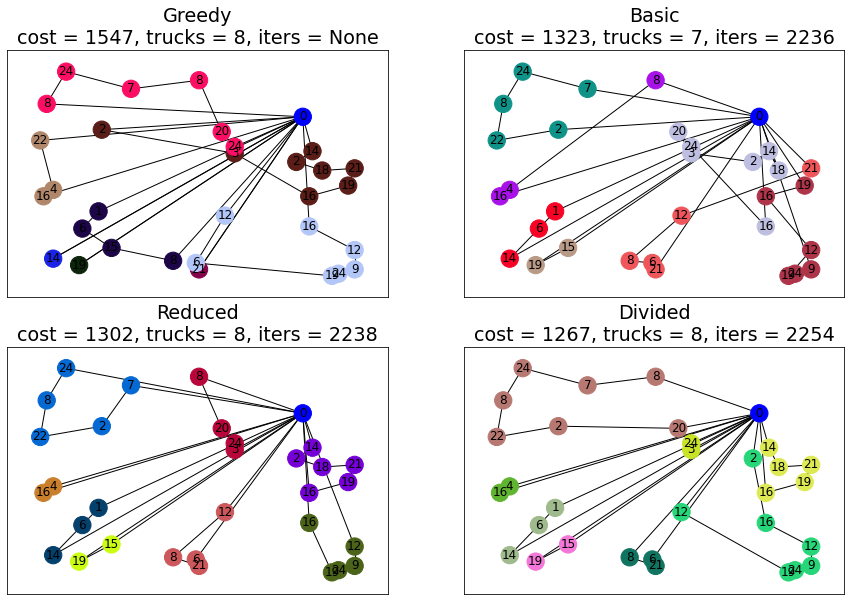

In [11]:
plot_4_solutions(greedy_s1, antColony_basic_s1, antColony_reduced_s1, antColony_divided_s1,
                 labels=True)

# small2

In [12]:
s_max = 285 # 285 is 7; Inf is 6 cars for Greedy
max_cars = 6

In [13]:
greedy_s2 = Greedy(print_warnings=True)
greedy_s2.set_problem(s_max, 5, problem_small2)
greedy_s2.optimize()
greedy_s2.best_number_of_cycles

Adding 0 as technical request for warehouse



7

In [14]:
antColony_basic_s2 = AntColony(print_warnings=True)
antColony_basic_s2.set_problem(s_max, max_cars, problem_small2)
antColony_basic_s2.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 1793.544 and uses 8 trucks
New best solution in 2 iteration: cost = 1791.883 and uses 8 trucks
New best solution in 3 iteration: cost = 1782.615 and uses 9 trucks
New best solution in 6 iteration: cost = 1769.911 and uses 11 trucks
New best solution in 7 iteration: cost = 1762.624 and uses 13 trucks
New best solution in 8 iteration: cost = 1761.523 and uses 13 trucks
New best solution in 13 iteration: cost = 1697.934 and uses 15 trucks
New best solution in 16 iteration: cost = 1669.153 and uses 14 trucks
New best solution in 22 iteration: cost = 1620.939 and uses 11 trucks
New best solution in 28 iteration: cost = 1604.062 and uses 13 trucks
New best solution in 149 iteration: cost = 1562.160 and uses 12 trucks
New best solution in 331 iteration: cost = 1550.977 and uses 10 trucks
New best solution in 359 iteration: cost = 1520.900 and uses 11 trucks
Time for optimizat

In [15]:
antColony_reduced_s2 = AntColony_Reduced(print_warnings=True)
antColony_reduced_s2.set_problem(s_max, max_cars, problem_small2)
antColony_reduced_s2.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 1490.921 and uses 11 trucks
New best solution in 1 iteration: cost = 1476.083 and uses 11 trucks
New best solution in 2 iteration: cost = 1408.151 and uses 12 trucks
New best solution in 16 iteration: cost = 1337.463 and uses 13 trucks
New best solution in 788 iteration: cost = 1305.673 and uses 12 trucks
Time for optimization has passed on 1033th iteration



In [16]:
antColony_divided_s2 = AntColony_Divided(print_warnings=True)
antColony_divided_s2.set_problem(s_max, max_cars, problem_small2)
antColony_divided_s2.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
3 clusters used with counts [16, 20, 7]
Adding 0 as technical request for warehouse
3 clusters used with counts [16, 20, 7]
Adding 0 as technical request for warehouse

Optimization of cluster 1 with 16 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 474.234 and uses 3 trucks
New best solution in 1 iteration: cost = 466.615 and uses 3 trucks
New best solution in 2 iteration: cost = 402.085 and uses 3 trucks
New best solution in 16 iteration: cost = 401.560 and uses 3 trucks
New best solution in 26 iteration: cost = 400.325 and uses 3 trucks
New best solution in 38 iteration: cost = 393.937 and uses 3 trucks
New best solution in 51 iteration: cost = 390.552 and uses 3 trucks
New best solution in 60 iteration: cost = 374.832 and uses 3 trucks
New best solution in 220 iteration: cost = 373.941 and uses 3 trucks
New best solution in 241 iteration: cost = 372.922 and uses 3 trucks
New best solution in 324 iteratio

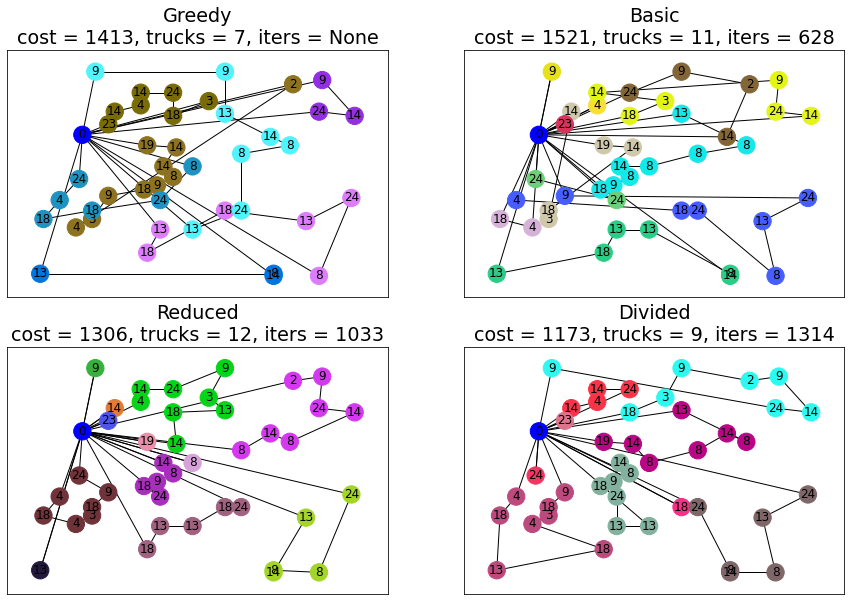

In [17]:
plot_4_solutions(greedy_s2, antColony_basic_s2, antColony_reduced_s2, antColony_divided_s2,
                 labels=True)

# medium1

In [18]:
s_max = 223 # 223 is 10, Inf is 9 cars for Greedy
max_cars = 9

In [19]:
greedy_m1 = Greedy(print_warnings=True)
greedy_m1.set_problem(s_max, max_cars, problem_medium1)
greedy_m1.optimize()
greedy_m1.best_number_of_cycles

Adding 0 as technical request for warehouse



10

In [20]:
antColony_basic_m1 = AntColony(print_warnings=True)
antColony_basic_m1.set_problem(s_max, max_cars, problem_medium1)
antColony_basic_m1.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 2567.710 and uses 13 trucks
New best solution in 1 iteration: cost = 2348.778 and uses 13 trucks
New best solution in 47 iteration: cost = 2289.083 and uses 14 trucks
New best solution in 97 iteration: cost = 2234.939 and uses 17 trucks
Time for optimization has passed on 657th iteration



In [21]:
antColony_reduced_m1 = AntColony_Reduced(print_warnings=True)
antColony_reduced_m1.set_problem(s_max, max_cars, problem_medium1)
antColony_reduced_m1.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 2243.654 and uses 16 trucks
New best solution in 1 iteration: cost = 2134.259 and uses 14 trucks
New best solution in 2 iteration: cost = 1969.596 and uses 15 trucks
New best solution in 256 iteration: cost = 1966.564 and uses 19 trucks
Time for optimization has passed on 619th iteration



In [22]:
antColony_divided_m1 = AntColony_Divided(print_warnings=True)
antColony_divided_m1.set_problem(s_max, max_cars, problem_medium1)
antColony_divided_m1.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
4 clusters used with counts [18, 18, 17, 6]
Adding 0 as technical request for warehouse
4 clusters used with counts [18, 18, 17, 6]
Adding 0 as technical request for warehouse

Optimization of cluster 1 with 18 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 741.141 and uses 4 trucks
New best solution in 1 iteration: cost = 718.104 and uses 4 trucks
New best solution in 5 iteration: cost = 691.554 and uses 4 trucks
New best solution in 10 iteration: cost = 638.653 and uses 3 trucks
New best solution in 25 iteration: cost = 606.882 and uses 3 trucks
New best solution in 102 iteration: cost = 604.065 and uses 3 trucks
New best solution in 190 iteration: cost = 601.811 and uses 3 trucks
Time for optimization has passed on 693th iteration


Optimization of cluster 2 with 18 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 469.952 and uses 3 trucks
New best solution in 1 iteration:

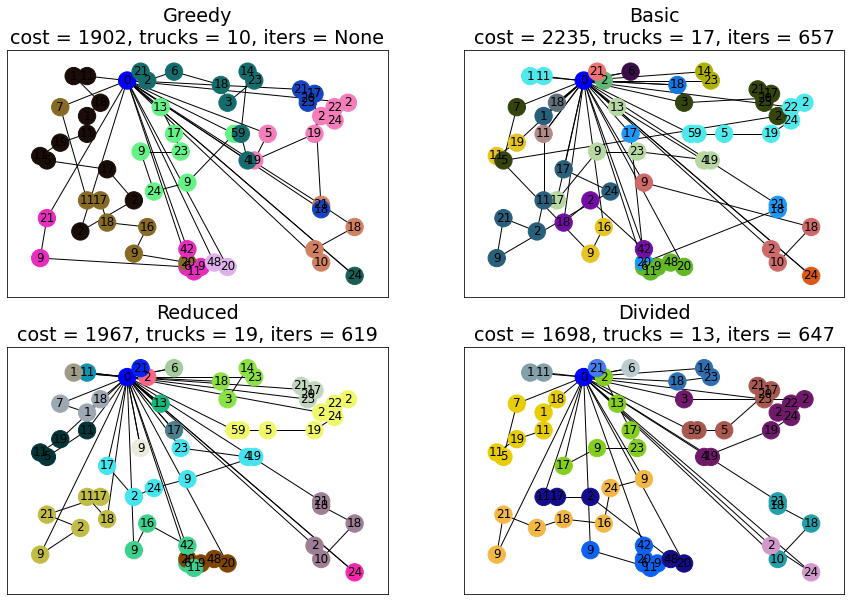

In [23]:
plot_4_solutions(greedy_m1, antColony_basic_m1, antColony_reduced_m1, antColony_divided_m1,
                 labels=True)

# medium2

In [24]:
s_max = 223 # 223 is 10, Inf is 9 cars for Greedy
max_cars = 10

In [25]:
greedy_m2 = Greedy(print_warnings=True)
greedy_m2.set_problem(s_max, max_cars, problem_medium1)
greedy_m2.optimize()
greedy_m2.best_number_of_cycles

Adding 0 as technical request for warehouse



10

In [26]:
antColony_basic_m2 = AntColony(cars_penalty=0.1, print_warnings=True)
antColony_basic_m2.set_problem(s_max, max_cars, problem_medium2)
antColony_basic_m2.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
There is a pair of destinations with the same coordinates:
17, 32
32, 17
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 2449.585 and uses 13 trucks
New best solution in 9 iteration: cost = 2391.011 and uses 20 trucks
New best solution in 31 iteration: cost = 2308.178 and uses 20 trucks
New best solution in 193 iteration: cost = 2305.248 and uses 19 trucks
New best solution in 300 iteration: cost = 2301.845 and uses 19 trucks
New best solution in 350 iteration: cost = 2270.838 and uses 17 trucks
New best solution in 436 iteration: cost = 2251.338 and uses 20 trucks
Time for optimization has passed on 495th iteration



In [27]:
antColony_reduced_m2 = AntColony_Reduced(print_warnings=True)
antColony_reduced_m2.set_problem(s_max, max_cars, problem_medium2)
antColony_reduced_m2.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
There is a pair of destinations with the same coordinates:
17, 32
32, 17
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 1847.706 and uses 18 trucks
New best solution in 1 iteration: cost = 1831.786 and uses 14 trucks
New best solution in 2 iteration: cost = 1776.624 and uses 16 trucks
New best solution in 221 iteration: cost = 1731.918 and uses 19 trucks
Time for optimization has passed on 474th iteration



In [28]:
antColony_divided_m2 = AntColony_Divided(print_warnings=True)
antColony_divided_m2.set_problem(s_max, max_cars, problem_medium2)
antColony_divided_m2.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
There is a pair of destinations with the same coordinates:
17, 32
32, 17
4 clusters used with counts [23, 16, 10, 19]
Adding 0 as technical request for warehouse
There is a pair of destinations with the same coordinates:
17, 32
32, 17
4 clusters used with counts [23, 16, 10, 19]
Adding 0 as technical request for warehouse
There is a pair of destinations with the same coordinates:
17, 32
32, 17

Optimization of cluster 1 with 23 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 634.747 and uses 4 trucks
New best solution in 2 iteration: cost = 622.962 and uses 4 trucks
New best solution in 5 iteration: cost = 572.057 and uses 4 trucks
New best solution in 7 iteration: cost = 568.059 and uses 4 trucks
New best solution in 16 iteration: cost = 494.629 and uses 3 trucks
New best solution in 81 iteration: cost = 456.324 and uses 3 trucks
Time for optimization has passed on 554th iteration


Optimization of cluster 2

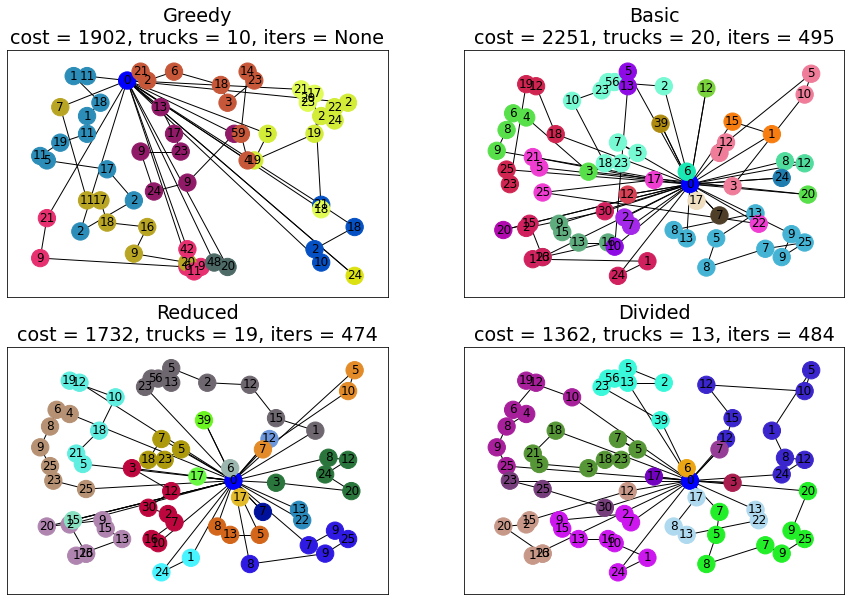

In [29]:
plot_4_solutions(greedy_m2, antColony_basic_m2, antColony_reduced_m2, antColony_divided_m2,
                 labels=True)

# big1

In [30]:
s_max = 1750 # 1750 is 29, Inf is 26 cars for Greedy
max_cars = 28

In [31]:
greedy_b1 = Greedy(print_warnings=True)
greedy_b1.set_problem(s_max, max_cars, problem_big1)
greedy_b1.optimize()
greedy_b1.best_number_of_cycles

Adding 0 as technical request for warehouse



29

In [32]:
antColony_basic_b1 = AntColony(cars_penalty=0.1, print_warnings=True)
antColony_basic_b1.set_problem(s_max, max_cars, problem_big1)
antColony_basic_b1.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 44214.090 and uses 30 trucks
New best solution in 1 iteration: cost = 43518.877 and uses 30 trucks
New best solution in 7 iteration: cost = 43261.095 and uses 38 trucks
New best solution in 187 iteration: cost = 42287.691 and uses 38 trucks
Time for optimization has passed on 202th iteration



In [33]:
antColony_reduced_b1 = AntColony_Reduced(cars_penalty=0.1, print_warnings=True)
antColony_reduced_b1.set_problem(s_max, max_cars, problem_big1)
antColony_reduced_b1.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 37625.483 and uses 35 trucks
New best solution in 1 iteration: cost = 36346.374 and uses 33 trucks
Time for optimization has passed on 190th iteration



In [34]:
antColony_divided_b1 = AntColony_Divided(cars_penalty=0.1, print_warnings=True)
antColony_divided_b1.set_problem(s_max, max_cars, problem_big1)
antColony_divided_b1.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
4 clusters used with counts [20, 43, 19, 18]
Adding 0 as technical request for warehouse
4 clusters used with counts [20, 43, 19, 18]
Adding 0 as technical request for warehouse

Optimization of cluster 1 with 20 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 8030.231 and uses 6 trucks
New best solution in 4 iteration: cost = 7824.304 and uses 6 trucks
New best solution in 11 iteration: cost = 7631.308 and uses 6 trucks
Time for optimization has passed on 228th iteration


Optimization of cluster 2 with 43 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 15566.531 and uses 12 trucks
Nearly no progress has been made on 1th iteration. Try the optimization with bigger number_of_cars


Optimization of cluster 3 with 19 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 6570.740 and uses 6 trucks
New best solution in 9 iteration: cost = 6526.066 and 

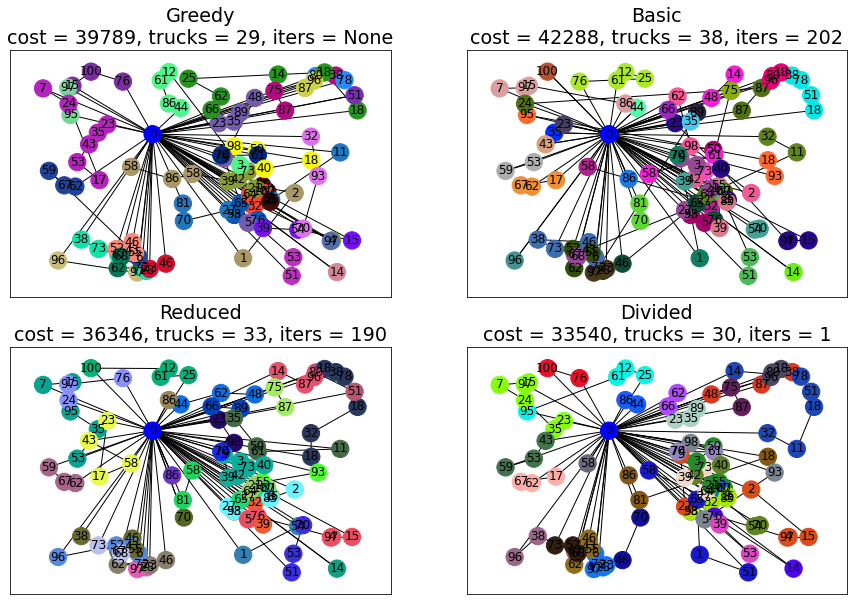

In [35]:
plot_4_solutions(greedy_b1, antColony_basic_b1, antColony_reduced_b1, antColony_divided_b1,
                 labels=True)

# big2

In [36]:
s_max = 2641.2 # 2641.2 is 10, Inf is 6 cars for Greedy
max_cars = 8

In [37]:
greedy_b2 = Greedy(print_warnings=True)
greedy_b2.set_problem(s_max, max_cars, problem_big2)
greedy_b2.optimize()
greedy_b2.best_number_of_cycles

Adding 0 as technical request for warehouse



10

In [38]:
antColony_basic_b2 = AntColony(print_warnings=True)
antColony_basic_b2.set_problem(s_max, max_cars, problem_big2)
antColony_basic_b2.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 54287.283 and uses 21 trucks
New best solution in 1 iteration: cost = 53751.847 and uses 21 trucks
New best solution in 4 iteration: cost = 52128.326 and uses 21 trucks
New best solution in 5 iteration: cost = 51149.550 and uses 23 trucks
New best solution in 8 iteration: cost = 50643.053 and uses 22 trucks
New best solution in 10 iteration: cost = 49562.015 and uses 22 trucks
New best solution in 11 iteration: cost = 47870.501 and uses 21 trucks
New best solution in 12 iteration: cost = 47691.821 and uses 20 trucks
New best solution in 61 iteration: cost = 47604.603 and uses 20 trucks
New best solution in 89 iteration: cost = 47592.029 and uses 20 trucks
New best solution in 118 iteration: cost = 46352.024 and uses 20 trucks
Time for optimization has passed on 165th iteration



In [39]:
antColony_reduced_b2 = AntColony_Reduced(print_warnings=True)
antColony_reduced_b2.set_problem(s_max, max_cars, problem_big2)
antColony_reduced_b2.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 41835.395 and uses 22 trucks
New best solution in 1 iteration: cost = 40313.449 and uses 21 trucks
New best solution in 4 iteration: cost = 37693.244 and uses 20 trucks
New best solution in 9 iteration: cost = 34328.530 and uses 17 trucks
New best solution in 132 iteration: cost = 34196.979 and uses 19 trucks
New best solution in 140 iteration: cost = 34137.010 and uses 17 trucks
Time for optimization has passed on 168th iteration



In [40]:
antColony_divided_b2 = AntColony_Divided(print_warnings=True)
antColony_divided_b2.set_problem(s_max, max_cars, problem_big2)
antColony_divided_b2.optimize(max_iter=10000, print_progress=True, max_time=max_time, rng_seed=rng_seed)

Adding 0 as technical request for warehouse
4 clusters used with counts [25, 48, 29, 17]
Adding 0 as technical request for warehouse
4 clusters used with counts [25, 48, 29, 17]
Adding 0 as technical request for warehouse

Optimization of cluster 1 with 25 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 15143.870 and uses 6 trucks
New best solution in 4 iteration: cost = 13109.216 and uses 5 trucks
New best solution in 7 iteration: cost = 13075.008 and uses 5 trucks
New best solution in 8 iteration: cost = 13013.955 and uses 5 trucks
New best solution in 10 iteration: cost = 12783.759 and uses 5 trucks
New best solution in 28 iteration: cost = 12622.601 and uses 5 trucks
Time for optimization has passed on 100th iteration


Optimization of cluster 2 with 48 nodes:
Optimization with rng_seed = 2022
New best solution in 0 iteration: cost = 10082.527 and uses 4 trucks
New best solution in 2 iteration: cost = 8938.094 and uses 4 trucks
New best solution in

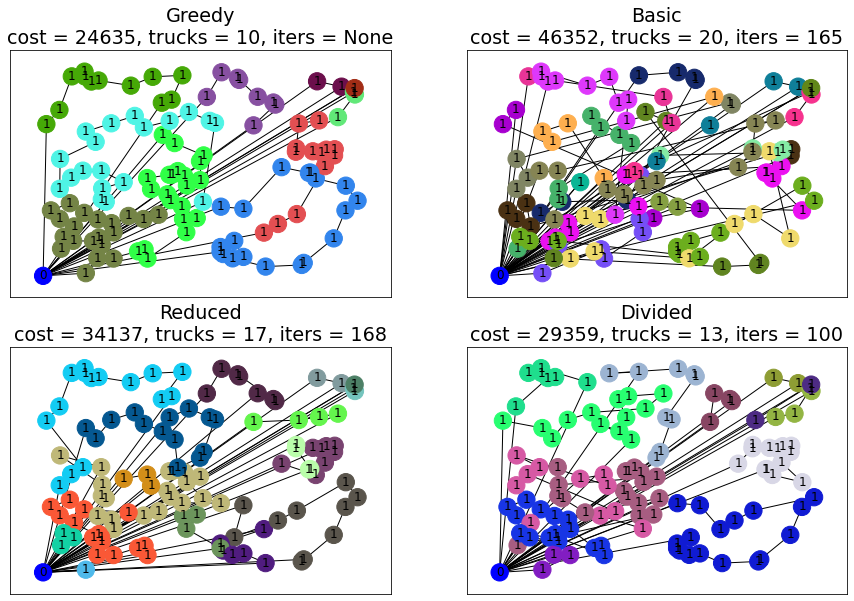

In [41]:
plot_4_solutions(greedy_b2, antColony_basic_b2, antColony_reduced_b2, antColony_divided_b2,
                 labels=True)